In [1]:
import torch
from torchvision import (
    datasets,
    transforms
)
from torch.utils import data

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [2]:
if torch.cuda.is_available():
    print("CUDA found, bounding...")
    DEVICE = torch.device('cuda:0')
else:
    print("NO CUDA found, bounding to CPU...")
    DEVICE = torch.device('cpu')

CUDA found, bounding...


In [3]:
torch.cuda.get_device_properties(DEVICE)

_CudaDeviceProperties(name='NVIDIA GeForce RTX 4060 Laptop GPU', major=8, minor=9, total_memory=8187MB, multi_processor_count=24)

In [4]:
DTYPE = torch.float32

Elementwise Operations
* ADDING, SUBTRACTING, MULTIPLYING, DIVIDING

In [5]:
A = torch.rand((5, 5), dtype=DTYPE, device=DEVICE)
A

tensor([[0.5023, 0.9403, 0.8253, 0.1782, 0.6994],
        [0.3318, 0.8174, 0.9194, 0.3462, 0.2950],
        [0.5146, 0.8581, 0.8854, 0.1683, 0.2503],
        [0.8186, 0.7402, 0.5642, 0.4545, 0.7890],
        [0.9063, 0.9561, 0.8494, 0.6333, 0.7681]], device='cuda:0')

In [6]:
A.shape, A.ndim

(torch.Size([5, 5]), 2)

In [7]:
B = torch.rand((5, 5), dtype=DTYPE, device=DEVICE)
B

tensor([[0.3398, 0.2363, 0.8470, 0.4500, 0.4403],
        [0.2082, 0.1894, 0.1093, 0.8685, 0.1408],
        [0.9793, 0.3976, 0.2515, 0.2996, 0.6298],
        [0.0363, 0.4731, 0.6364, 0.4085, 0.9190],
        [0.8217, 0.0884, 0.7351, 0.5111, 0.2912]], device='cuda:0')

In [8]:
B.shape, B.ndim

(torch.Size([5, 5]), 2)

In [10]:
0.5023 + 0.3398

0.8421

In [12]:
# Adding
torch.add(A, B).all() == (A + B).all()

tensor(True, device='cuda:0')

In [14]:
0.5023 - 0.3398

0.16249999999999998

In [16]:
# Subtracting
torch.sub(A, B).all() == (A - B).all()

tensor(True, device='cuda:0')

In [18]:
0.5023 * 0.3398

0.17068154

In [20]:
# Multiplying
torch.mul(A, B).all() == (A * B).all()

tensor(True, device='cuda:0')

In [22]:
0.5023 / 0.3398

1.4782224838140081

In [26]:
# Dividing
torch.div(A, B).all() == (A / B).all()

tensor(True, device='cuda:0')

In [27]:
(2 * A + B ** 4) ** 3

tensor([[ 1.0548,  6.6849, 10.1514,  0.0628,  2.9638],
        [ 0.2948,  4.3790,  6.2197,  2.0075,  0.2058],
        [ 7.4057,  5.2785,  5.5913,  0.0409,  0.2847],
        [ 4.3879,  3.5854,  2.1588,  0.8221, 12.0321],
        [11.6754,  6.9933,  7.8886,  2.3778,  3.6765]], device='cuda:0')

In [28]:
torch.exp(A)

tensor([[1.6525, 2.5608, 2.2827, 1.1951, 2.0126],
        [1.3935, 2.2645, 2.5079, 1.4138, 1.3431],
        [1.6730, 2.3586, 2.4241, 1.1833, 1.2843],
        [2.2673, 2.0964, 1.7580, 1.5753, 2.2013],
        [2.4752, 2.6016, 2.3382, 1.8837, 2.1557]], device='cuda:0')

In [29]:
torch.e ** 0.5023

1.6525176938357546

In [30]:
R = torch.randn((5, 5), dtype=DTYPE, device=DEVICE)
R

tensor([[-1.7679, -0.8292,  0.7698,  0.2042, -0.2574],
        [-0.1555,  0.1481, -0.2778,  0.0764, -0.1089],
        [-0.3983,  2.1389, -0.8686,  0.9716, -1.8543],
        [ 0.7058,  1.4628,  0.8324,  0.2932, -0.2110],
        [-0.1753,  2.3483, -0.2415, -0.4547, -0.0243]], device='cuda:0')

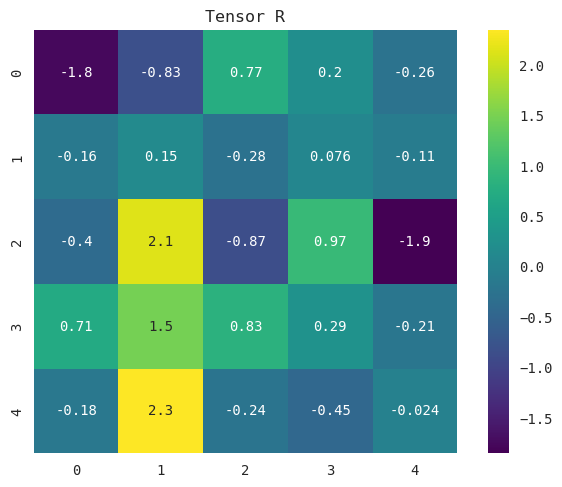

In [39]:
sns.heatmap(
    R.cpu(),
    cmap='viridis',
    square=True,
    annot=True,
    cbar=True
);
plt.title("Tensor R");

In [40]:
R = torch.abs(R)

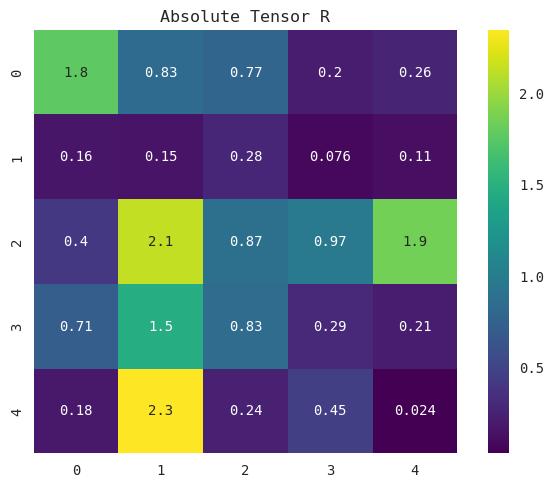

In [41]:
sns.heatmap(
    R.cpu(),
    cmap='viridis',
    square=True,
    annot=True,
    cbar=True
);
plt.title("Absolute Tensor R");

Dot Product

1. Vector - Vector
2. Vector - Matrix

# 1. Vector - Vector Dot Product
( ! ) Vectors needs to be at size N -> Number of elements

V0 = [1., 2., 3., 4., 5.]
V1 = [0., 10., 5., 2., 3.]

sum([1., 2., 3., 4., 5.] * [0., 10., 5., 2., 3.])
-> (1. * 0.) + (2. * 10.) + (3. * 5.) + (4. * 2.) + (5. * 3.) = 0. + 20. + 15. + 8. + 15. = 58.

-> Result: [58.]

In [42]:
V0 = torch.arange(1, 6, 1, dtype=DTYPE, device=DEVICE)
V0

tensor([1., 2., 3., 4., 5.], device='cuda:0')

In [43]:
V1 = torch.tensor([0., 10., 5., 2., 3.], dtype=DTYPE, device=DEVICE)
V1

tensor([ 0., 10.,  5.,  2.,  3.], device='cuda:0')

In [44]:
V0.numel() == V1.numel()

True

In [45]:
torch.dot(V0, V1)

tensor(58., device='cuda:0')

In [49]:
torch.sum(torch.mul(V0, V1)) == torch.dot(V0, V1)

tensor(True, device='cuda:0')